<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/C_Elegans_Binary_Undirected_Graph_First_steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph

We will use the global binary graph of C. Elegans neurons as an example of an undirected graph and apply the techniques from the book 'Fundamentals of Brain Network'

In [1]:

from google.colab import drive

# Monta tu Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


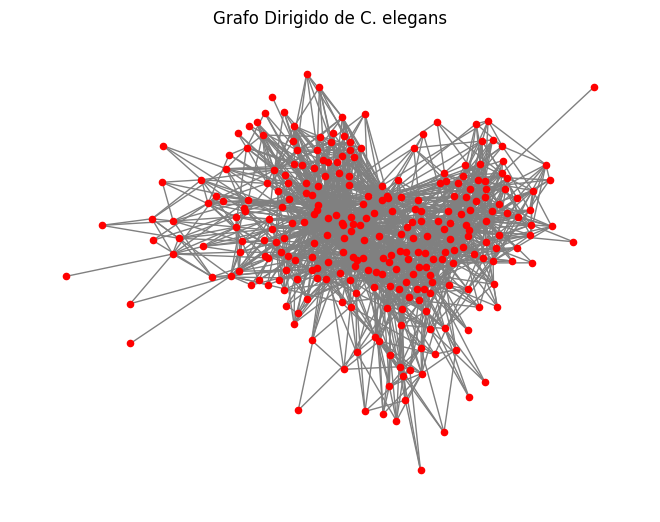

In [3]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()


# plot the graph
pos = nx.spring_layout(G)

  # Graph layout (one can change it)
nx.draw(G, pos, node_size=20, node_color='red', edge_color='gray')
plt.title("Grafo Dirigido de C. elegans")
plt.show()


# Adjacency Matrix

we obtain the adjacency matrix

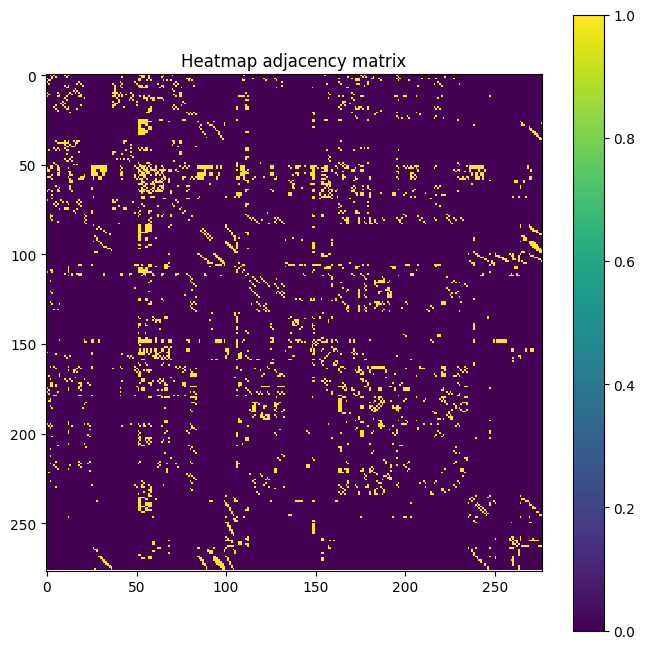

Adjacency Matrix:
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
adj_matrix = nx.adjacency_matrix(G)
# Convert the adjacency matrix to a NumPy array.
adj_matrix = adj_matrix.toarray()

# Visualize the matrix
plt.figure(figsize=(8, 8))
plt.imshow(adj_matrix, cmap='viridis', interpolation='none')
plt.colorbar()
plt.title('Heatmap adjacency matrix')
plt.show()

# Mostrar la matriz en términos numéricos
print("Adjacency Matrix:")
print(adj_matrix)

Let's see if the adjacency matrix is symmetric (it should)

In [5]:
is_symmetric = np.array_equal(adj_matrix, adj_matrix.T)
if is_symmetric:
    print("The adjacency matrix is symmetric")
else:
    print("The adjacency matrix isn't symmetric")

The adjacency matrix is symmetric


Network degree or number of edges:

In [6]:
G.number_of_edges()

1918

In [7]:
## We can check it
adj_matrix.sum()/2

1918.0

**Connection density**


Connection density is the ratio of edges in the graph divided by the possible
number of edges.


$\kappa = \frac{2E}{N(N-1)} $

In [8]:
# Calculate the number of edges (E)
num_edges = G.number_of_edges()

# Calculate the number of vertices (V)
num_vertices = G.number_of_nodes()

# Calculate the connection density (D)
density = (2 * num_edges) / (num_vertices * (num_vertices - 1))
density

0.05017527337414325

# Node degree

17


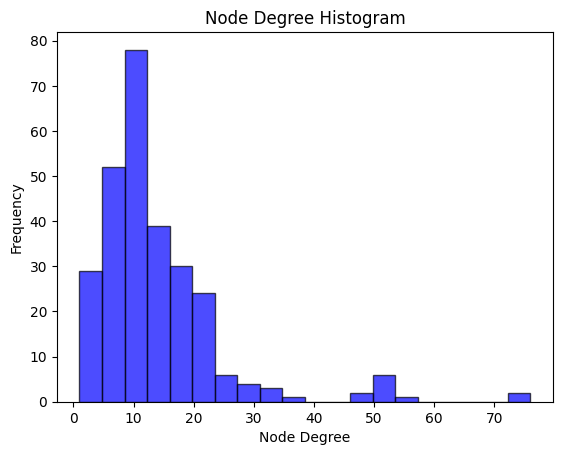

Mean degree: 13.848375451263538
Median degree: 11


In [9]:
degrees = G.degree()
k = 5
print(degrees[5]) ### value of node k


# Calculate the node degrees
degrees = [degree for node, degree in G.degree()]

# Create a histogram of degrees
plt.hist(degrees, bins=20, alpha=0.7, color='b', edgecolor='k')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Node Degree Histogram')
plt.show()


# Calculate the mean degree
mean_degree = sum(degrees) / len(degrees)
print(f"Mean degree: {mean_degree}")

# Calculate the median degree
median_degree = sorted(degrees)[len(degrees) // 2]
print(f"Median degree: {median_degree}")

We can overlap the lognormal distribution that best fit the data

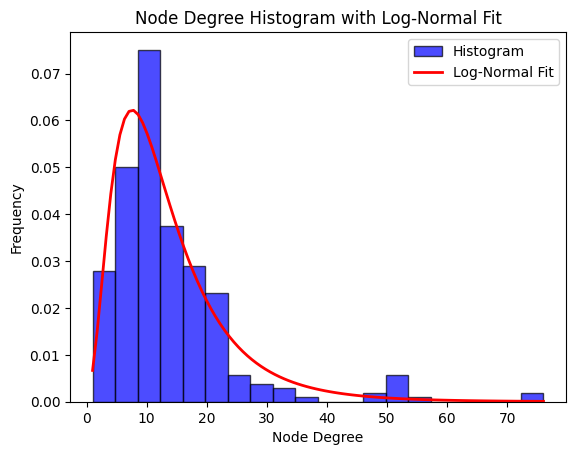

In [10]:
from scipy.stats import lognorm

shape, loc, scale = lognorm.fit(degrees)

x = np.linspace(min(degrees), max(degrees), 100)
pdf = lognorm.pdf(x, shape, loc, scale)


plt.hist(degrees, bins=20, alpha=0.7, color='b', edgecolor='k', density=True, label='Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Log-Normal Fit')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Node Degree Histogram with Log-Normal Fit')
plt.legend()
plt.show()
